# Import Libraries


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import great_circle

% matplotlib inline

print('Pandas version', pd.__version__)
print('Numpy version', np.__version__)

Pandas version 0.20.3
Numpy version 1.14.0


## Read in School Data

In [2]:
schools = pd.read_pickle('../data/schools_w_social.pkl')

In [3]:
schools.head()

,School_ID,Short_Name,Long_Name,School_Type,Zip,Facebook,Twitter,Student_Count_Total,Student_Count_Low_Income,School_Hours,Transportation_El,School_Latitude,School_Longitude,Average_ACT_School,Graduation_Rate_School,fb_likes,tw_followers,tw_tweets
10,609764,JUAREZ HS,Benito Juarez Community Academy High School,Neighborhood,60608,NaN,NaN,1739,1659,7:45 AM - 2:35 PM,"Blue, Pink, Red",41.852667,-87.663732,16.5,80.9,NaN,NaN,NaN
11,400054,NOBLE - PRITZKER HS,Noble - Pritzker College Prep,Charter,60639,https://www.facebook.com/benoblepritzker,http://twitter.com/benoblepritzker,992,936,M - R 8:05AM. - 3:50PM F 8:05- 1:30PM,"Blue, Brown",41.915214,-87.730127,21.9,90.3,1793.0,275.0,448.0
12,609726,BROOKS HS,Gwendolyn Brooks College Preparatory Academy HS,Selective enrollment,60628,NaN,https://twitter.com/BrooksPrepCSL,959,692,8:00 AM - 3:30 PM,Orange,41.692763,-87.616353,22.5,93.4,NaN,408.0,3869.0
14,400094,EPIC HS,EPIC Academy Charter High School,Charter,60617,https://www.facebook.com/EPICAcademyHighSchool,https://twitter.com/EPIC_Academy,523,491,8:10 AM-3:50 PM,NaN,41.744849,-87.550222,17.5,69.9,424.0,305.0,787.0
21,609755,YOUNG HS,Whitney M Young Magnet High School,Selective enrollment,60607,http://www.facebook.com/wmymhs,http://www.twitter.com/wyhs,2156,891,8:00 AM - 3:15 PM,Blue,41.878603,-87.664233,27.9,96.2,4004.0,1708.0,999.0


## Convert School Lat/Lons into projected points

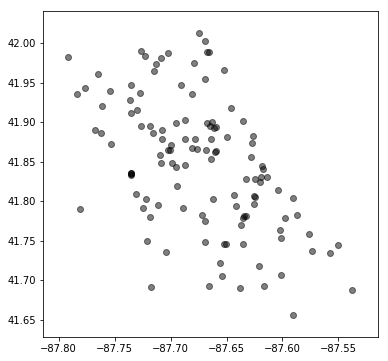

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(schools['School_Longitude'], schools['School_Latitude'], alpha=0.5, c='k')

# Import Crime Data

## Read in crime data

In [10]:
crimes = pd.read_pickle('../data/cleaned_crimes.pkl')

In [11]:
crimes.head()

,ID,Date,Primary Type,Arrest,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude
0,10801165,01/01/2017 01:00:00 AM,BATTERY,True,8,1175950.0,1908370.0,41.903933,-87.629129
1,10801166,01/01/2017 01:23:00 AM,PUBLIC PEACE VIOLATION,True,71,1171453.0,1848804.0,41.740579,-87.647394
2,10801090,01/01/2017 12:01:00 AM,CRIMINAL DAMAGE,False,42,1187984.0,1862596.0,41.778047,-87.586388
3,10801213,01/01/2017 01:00:00 AM,BATTERY,False,30,1158068.0,1888177.0,41.848906,-87.695365
4,10801214,01/01/2017 01:45:00 AM,CRIMINAL DAMAGE,True,5,1162249.0,1928318.0,41.958969,-87.678896


In [73]:
X_crime = crimes.loc[:, 'Longitude']
Y_crime = crimes.loc[:, 'Latitude']

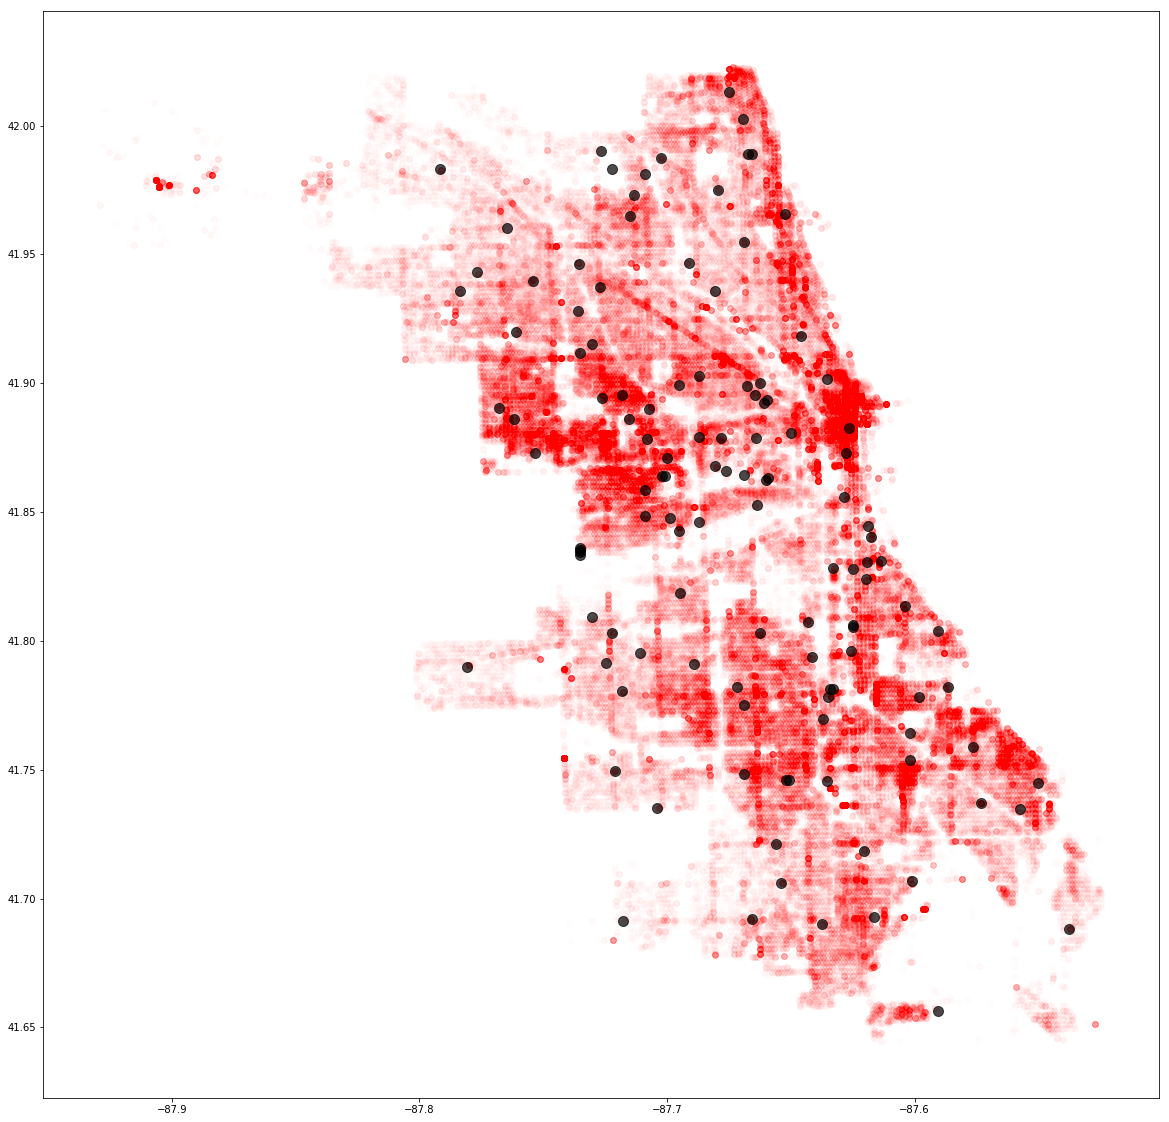

In [74]:
plt.figure(figsize=(20,20))
plt.scatter(X_crime, Y_crime, alpha=0.01, c='r')
plt.scatter(schools['School_Longitude'], schools['School_Latitude'], alpha=0.7, c='k', s=100)

## Find Count of 2017 Crimes in Chicago within a .15 mile radius of the school grounds

In [41]:
def zip_coordinates(df, lat_col, lon_col, id_col):
    """
    Take a df and column names for the lat/long and id of observations you would like to zip 
    and return a list of tuples with the identifier and lat/long coordinates
    """
    lats = list(df[lat_col])
    lons = list(df[lon_col])
    coords = list(zip(lats, lons))
    
    bound = list(zip(df[id_col], coords))
    
    return bound

In [50]:
def count_nearby_crimes(school_list, crime_list, radius_max=0.125):
    """
    Take a list of coordinates for schools and list of crimes with coordinates to find the count
    of crimes within some radius of each school. Returns list of crimes the length of the school list
    """
    
    # Count crimes within .125 (~1 city block) of the school 
    nearby_crime_ct = []

    for index, school in enumerate(school_list):

        crime_count = 0

        for index, crime in enumerate(crime_list):
            distance = great_circle(school[1], crime[1]).miles

            if distance < radius_max:
                crime_count += 1

        nearby_crime_ct.append(crime_count)
        
    return nearby_crime_ct

In [51]:
school_list = zip_coordinates(df=schools, 
                              id_col='School_ID',
                              lat_col='School_Latitude',
                              lon_col='School_Longitude')

crimes_list = zip_coordinates(df=crimes, 
                              id_col='ID',
                              lat_col='Latitude',
                              lon_col='Longitude')

nearby_crimes = count_nearby_crimes(school_list=school_list, crime_list=crimes_list)

In [52]:
print(len(nearby_crimes))
nearby_crimes[:5]

121


[36, 82, 32, 100, 53]

In [53]:
schools.head()

,School_ID,Short_Name,Long_Name,School_Type,Zip,Facebook,Twitter,Student_Count_Total,Student_Count_Low_Income,School_Hours,Transportation_El,School_Latitude,School_Longitude,Average_ACT_School,Graduation_Rate_School,fb_likes,tw_followers,tw_tweets
10,609764,JUAREZ HS,Benito Juarez Community Academy High School,Neighborhood,60608,NaN,NaN,1739,1659,7:45 AM - 2:35 PM,"Blue, Pink, Red",41.852667,-87.663732,16.5,80.9,NaN,NaN,NaN
11,400054,NOBLE - PRITZKER HS,Noble - Pritzker College Prep,Charter,60639,https://www.facebook.com/benoblepritzker,http://twitter.com/benoblepritzker,992,936,M - R 8:05AM. - 3:50PM F 8:05- 1:30PM,"Blue, Brown",41.915214,-87.730127,21.9,90.3,1793.0,275.0,448.0
12,609726,BROOKS HS,Gwendolyn Brooks College Preparatory Academy HS,Selective enrollment,60628,NaN,https://twitter.com/BrooksPrepCSL,959,692,8:00 AM - 3:30 PM,Orange,41.692763,-87.616353,22.5,93.4,NaN,408.0,3869.0
14,400094,EPIC HS,EPIC Academy Charter High School,Charter,60617,https://www.facebook.com/EPICAcademyHighSchool,https://twitter.com/EPIC_Academy,523,491,8:10 AM-3:50 PM,NaN,41.744849,-87.550222,17.5,69.9,424.0,305.0,787.0
21,609755,YOUNG HS,Whitney M Young Magnet High School,Selective enrollment,60607,http://www.facebook.com/wmymhs,http://www.twitter.com/wyhs,2156,891,8:00 AM - 3:15 PM,Blue,41.878603,-87.664233,27.9,96.2,4004.0,1708.0,999.0


In [54]:
schools['crime_counts'] = nearby_crimes

In [56]:
schools.sort_values('crime_counts', ascending=False)

,School_ID,Short_Name,Long_Name,School_Type,Zip,Facebook,Twitter,Student_Count_Total,Student_Count_Low_Income,School_Hours,Transportation_El,School_Latitude,School_Longitude,Average_ACT_School,Graduation_Rate_School,fb_likes,tw_followers,tw_tweets,crime_counts
554,400098,NOBLE - MUCHIN HS,Noble - Muchin College Prep,Charter,60602,http://www.facebook.com/BeNobleMuchin,https://twitter.com/BeNobleMuchin,964,804,"M- R 7:50 AM - 3:53 PM, F 7:50 AM - 12:25 PM","Blue, Brown, Green, Orange, Pink, Purple, Red",41.882740,-87.626338,21.8,86.4,600.0,287.0,421.0,2145
476,609678,JONES HS,William Jones College Preparatory High School,Selective enrollment,60605,https://www.facebook.com/JonesCollegePrepHS/,https://twitter.com/jonescollegehs,1866,732,8:00 am - 3:15 pm,"Blue, Brown, Pink, Red",41.873066,-87.627675,26.2,91.8,NaN,455.0,549.0,348
36,400056,NOBLE - ROWE CLARK HS,Noble - Rowe-Clark Math and Science Academy,Charter,60651,https://www.facebook.com/BeNobleRCMSA/,https://twitter.com/BeNobleRCMSA,474,441,"M - R 8:00 a.m. - 4:00 p.m., F 8:30 a.m. - 1:3...","Blue, Brown, Green",41.895362,-87.718047,18.5,82.4,427.0,187.0,205.0,333
55,400058,NORTH LAWNDALE - CHRISTIANA HS,North Lawndale College Prep - Christiana,Charter,60623,https://www.facebook.com/nlcphs,NaN,357,349,8:00 a.m. - 3:30 p.m.,Green,41.858564,-87.708987,15.3,67.1,1419.0,NaN,NaN,229
352,610389,ORR HS,Orr Academy High School,Neighborhood,60624,https://www.facebook.com/orracademyhighschool,https://twitter.com/orracademy,276,263,"7:45am - 2:42pm (M,T,TH,F); 7:45am - 1:32pm (W)",NaN,41.894449,-87.726166,14.2,39.0,424.0,213.0,70.0,199
29,610518,AUSTIN CCA HS,Austin College and Career Academy High School,Small,60644,NaN,https://twitter.com/ACCAChicago,223,216,8:40 AM - 3:53 PM,Green,41.885993,-87.761916,14.6,70.9,NaN,65.0,184.0,184
38,610394,UPLIFT HS,Uplift Community High School,Small,60640,NaN,https://twitter.com/UpliftTitans,245,229,8:30 AM - 3:38 PM,Red,41.965547,-87.652473,15.6,74.3,NaN,27.0,48.0,175
138,400105,URBAN PREP - BRONZEVILLE HS,Urban Prep Academy for Young Men - Bronzeville,Charter,60616,https://www.facebook.com/UrbanPrepAcademies/,NaN,322,262,8:30 AM-4:30 PM,"Green, Red",41.831118,-87.613629,16.6,82.4,11744.0,NaN,NaN,174
191,609754,CHICAGO MILITARY HS,Chicago Military Academy High School,Military academy,60653,NaN,NaN,313,295,7:30 am-3:05 pm,"Green, Red",41.830555,-87.619216,16.9,85.4,NaN,NaN,NaN,173
206,609722,MANLEY HS,Manley Career Academy High School,Neighborhood,60612,https://www.facebook.com/manleyhighschool,NaN,113,105,9:00 AM - 4:23 PM,Blue,41.870939,-87.699896,14.1,57.9,152.0,NaN,NaN,154


In [64]:
schools.reset_index(drop=True, inplace=True)

# Deal with Outliers

## Find Outliers

It looks like there are a few schools at the top with a really high count of crime - let's see what this distribution looks like on a density plot

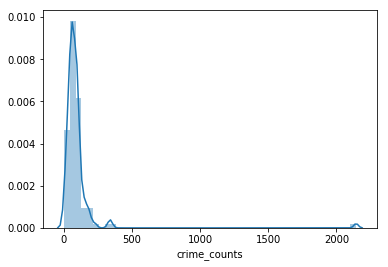

In [63]:
sns.distplot(schools['crime_counts'])

Ok, so the top outlier is a school in the loop by Washington and State (high density area with crime likely unrelated to the school - let's find the statistical outliers of schools by crime and checkout out where these schools are located

In [79]:
schools['crime_counts'].describe()

count     121.000000
mean       98.214876
std       195.082897
min         1.000000
25%        50.000000
50%        71.000000
75%        99.000000
max      2145.000000
Name: crime_counts, dtype: float64

In [82]:
def find_outliers(series, multiplier=1.5):
    """
    Takes as input a series, identifies the outliers as defined as 1.5 * IQR from the .75 Q and return a mask to identify them
    """
    adjusted_IQR = (series.quantile(.75) - series.quantile(.25)) * multiplier
    outlier_lim = series.quantile(.75) + adjusted_IQR
    print(outlier_lim)
    
    outliers = [True if x > outlier_lim else False for x in series]
    
    outlier_count = sum(outliers)
    all_data_count = len(series)
    print('{} outliers identified: {} of all data'.format(outlier_count, round(outlier_count/all_data_count,6)))
    
    return outliers
    

In [84]:
crime_outliers = find_outliers(schools['crime_counts'])
schools['crime_outlier'] = crime_outliers

172.5
9 outliers identified: 0.07438 of all data


In [ ]:
X_crime = crimes.loc[:, 'Longitude']
Y_crime = crimes.loc[:, 'Latitude']

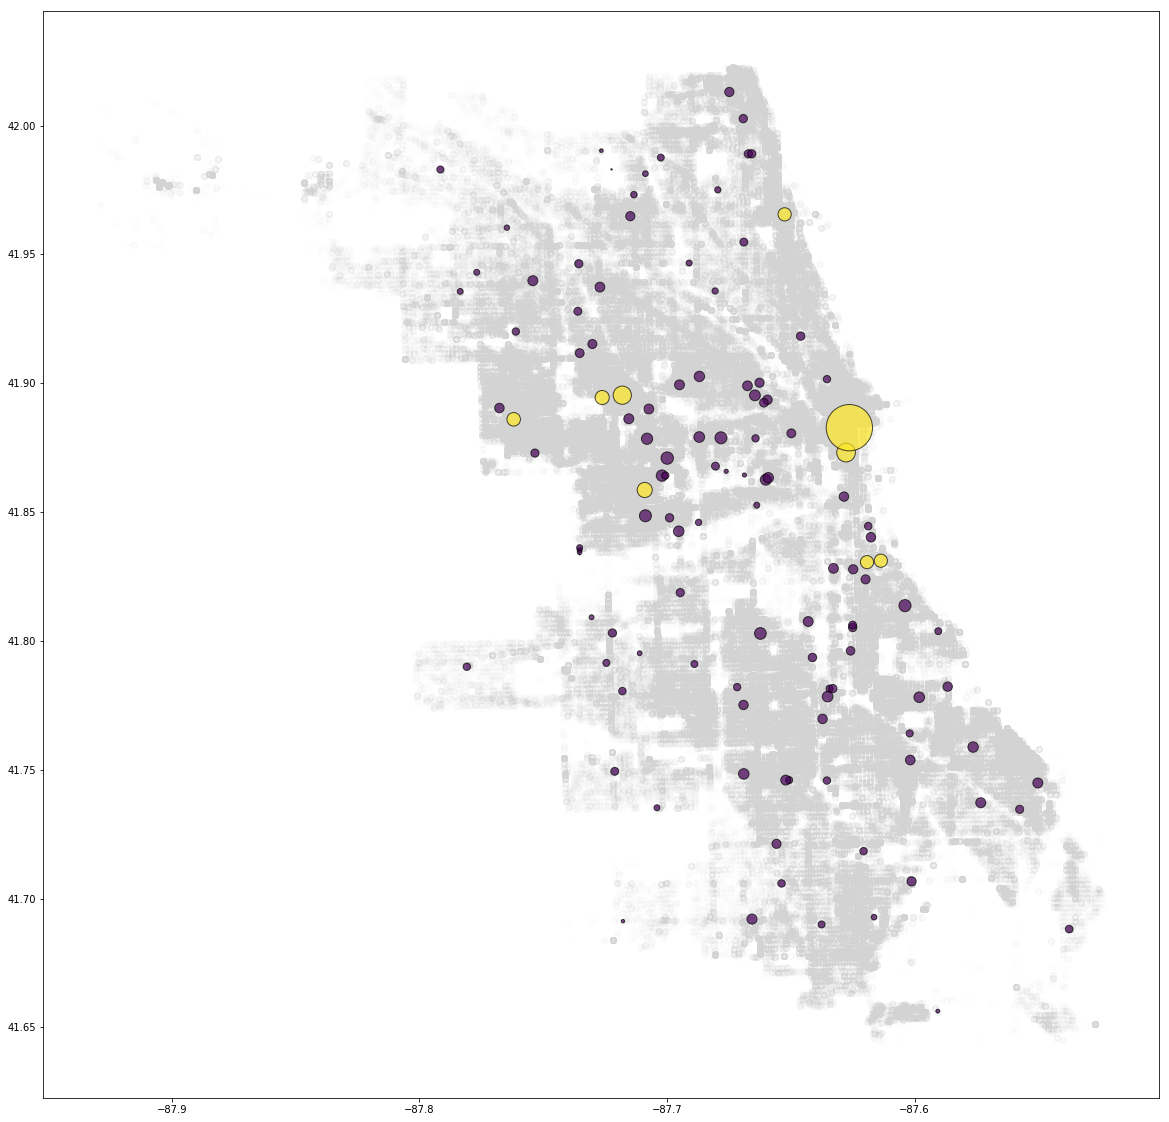

In [96]:
plt.figure(figsize=(20,20))
plt.scatter(X_crime, Y_crime, alpha=0.01, c='lightgrey')
plt.scatter(schools['School_Longitude'], schools['School_Latitude'], alpha=0.7, 
            c=schools['crime_outlier'], edgecolors='k',
            s=schools['crime_counts'])

## Replace Outliers w Mean

Ok, so the two largest dots situated in the loop stick out to me because:
- They are situated in highly dense areas where crimes unrelated to the school are very likely occuring within 1 city block of the school location
- These two outliers are not near other, similarly sized dots while the rest of the outliers appear to be relatively consistent with surrounding schools

For now, I'm going to replace these two crime counts with the median count for the dataset

In [232]:
sorted_schools = schools.sort_values('crime_counts', ascending=False)
sorted_schools.reset_index(inplace=True)

sorted_schools['crime_counts'][0]

2145

In [233]:
def replace_top_X_mean(series, indices_to_replace):
    
    others = series
    to_replace = []
    
    for i in indices_to_replace:
        to_replace.append(others.pop(i))
    
    for i, c in enumerate(to_replace):
        to_replace[i] = int(others.mean())
        
    to_replace.extend(others)
        
    return to_replace


In [234]:
sorted_schools['crime_counts'] = replace_top_X_mean(sorted_schools['crime_counts'], [0,1])

In [235]:
sorted_schools.head()

,index,School_ID,Short_Name,Long_Name,School_Type,Zip,Facebook,Twitter,Student_Count_Total,Student_Count_Low_Income,...,Transportation_El,School_Latitude,School_Longitude,Average_ACT_School,Graduation_Rate_School,fb_likes,tw_followers,tw_tweets,crime_counts,crime_outlier
0,100,400098,NOBLE - MUCHIN HS,Noble - Muchin College Prep,Charter,60602,http://www.facebook.com/BeNobleMuchin,https://twitter.com/BeNobleMuchin,964,804,...,"Blue, Brown, Green, Orange, Pink, Purple, Red",41.882740,-87.626338,21.8,86.4,600.0,287.0,421.0,78,True
1,91,609678,JONES HS,William Jones College Preparatory High School,Selective enrollment,60605,https://www.facebook.com/JonesCollegePrepHS/,https://twitter.com/jonescollegehs,1866,732,...,"Blue, Brown, Pink, Red",41.873066,-87.627675,26.2,91.8,NaN,455.0,549.0,78,True
2,8,400056,NOBLE - ROWE CLARK HS,Noble - Rowe-Clark Math and Science Academy,Charter,60651,https://www.facebook.com/BeNobleRCMSA/,https://twitter.com/BeNobleRCMSA,474,441,...,"Blue, Brown, Green",41.895362,-87.718047,18.5,82.4,427.0,187.0,205.0,333,True
3,10,400058,NORTH LAWNDALE - CHRISTIANA HS,North Lawndale College Prep - Christiana,Charter,60623,https://www.facebook.com/nlcphs,NaN,357,349,...,Green,41.858564,-87.708987,15.3,67.1,1419.0,NaN,NaN,229,True
4,66,610389,ORR HS,Orr Academy High School,Neighborhood,60624,https://www.facebook.com/orracademyhighschool,https://twitter.com/orracademy,276,263,...,NaN,41.894449,-87.726166,14.2,39.0,424.0,213.0,70.0,199,True


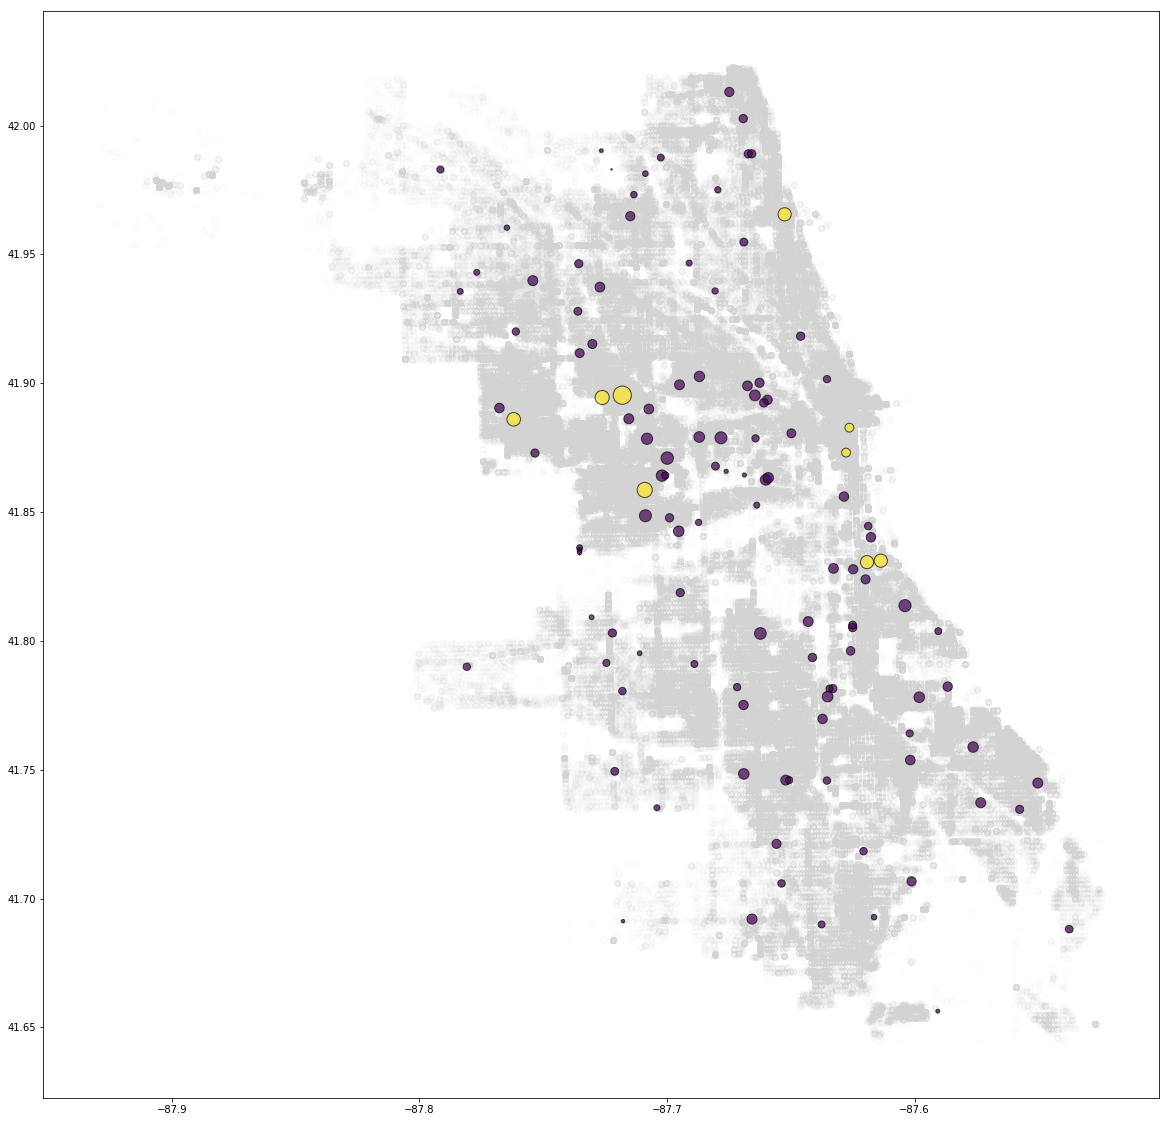

In [236]:
plt.figure(figsize=(20,20))
plt.scatter(X_crime, Y_crime, alpha=0.01, c='lightgrey')
plt.scatter(sorted_schools['School_Longitude'], sorted_schools['School_Latitude'], alpha=0.7, 
            c=sorted_schools['crime_outlier'], edgecolors='k',
            s=sorted_schools['crime_counts'])

# Normalize Crime Data

Because these schools vary in size, I want to normalize the count of crimes taking place around the school by finding the count of crimes per student

In [237]:
sorted_schools['crimes_per_student'] = [(crimes/students) for (crimes, students) 
                                                        in zip(sorted_schools['crime_counts'], sorted_schools['Student_Count_Total'])]

# I'll also compute crimes per 1000 students for the sake of plotting
sorted_schools['crimes_per_1000_students'] = [crimes * 1000 for crimes in sorted_schools['crimes_per_student']]

In [238]:
sorted_schools.head()

,index,School_ID,Short_Name,Long_Name,School_Type,Zip,Facebook,Twitter,Student_Count_Total,Student_Count_Low_Income,...,School_Longitude,Average_ACT_School,Graduation_Rate_School,fb_likes,tw_followers,tw_tweets,crime_counts,crime_outlier,crimes_per_student,crimes_per_1000_students
0,100,400098,NOBLE - MUCHIN HS,Noble - Muchin College Prep,Charter,60602,http://www.facebook.com/BeNobleMuchin,https://twitter.com/BeNobleMuchin,964,804,...,-87.626338,21.8,86.4,600.0,287.0,421.0,78,True,0.080913,80.912863
1,91,609678,JONES HS,William Jones College Preparatory High School,Selective enrollment,60605,https://www.facebook.com/JonesCollegePrepHS/,https://twitter.com/jonescollegehs,1866,732,...,-87.627675,26.2,91.8,NaN,455.0,549.0,78,True,0.041801,41.800643
2,8,400056,NOBLE - ROWE CLARK HS,Noble - Rowe-Clark Math and Science Academy,Charter,60651,https://www.facebook.com/BeNobleRCMSA/,https://twitter.com/BeNobleRCMSA,474,441,...,-87.718047,18.5,82.4,427.0,187.0,205.0,333,True,0.702532,702.531646
3,10,400058,NORTH LAWNDALE - CHRISTIANA HS,North Lawndale College Prep - Christiana,Charter,60623,https://www.facebook.com/nlcphs,NaN,357,349,...,-87.708987,15.3,67.1,1419.0,NaN,NaN,229,True,0.641457,641.456583
4,66,610389,ORR HS,Orr Academy High School,Neighborhood,60624,https://www.facebook.com/orracademyhighschool,https://twitter.com/orracademy,276,263,...,-87.726166,14.2,39.0,424.0,213.0,70.0,199,True,0.721014,721.014493


Lets see how this changes our map view

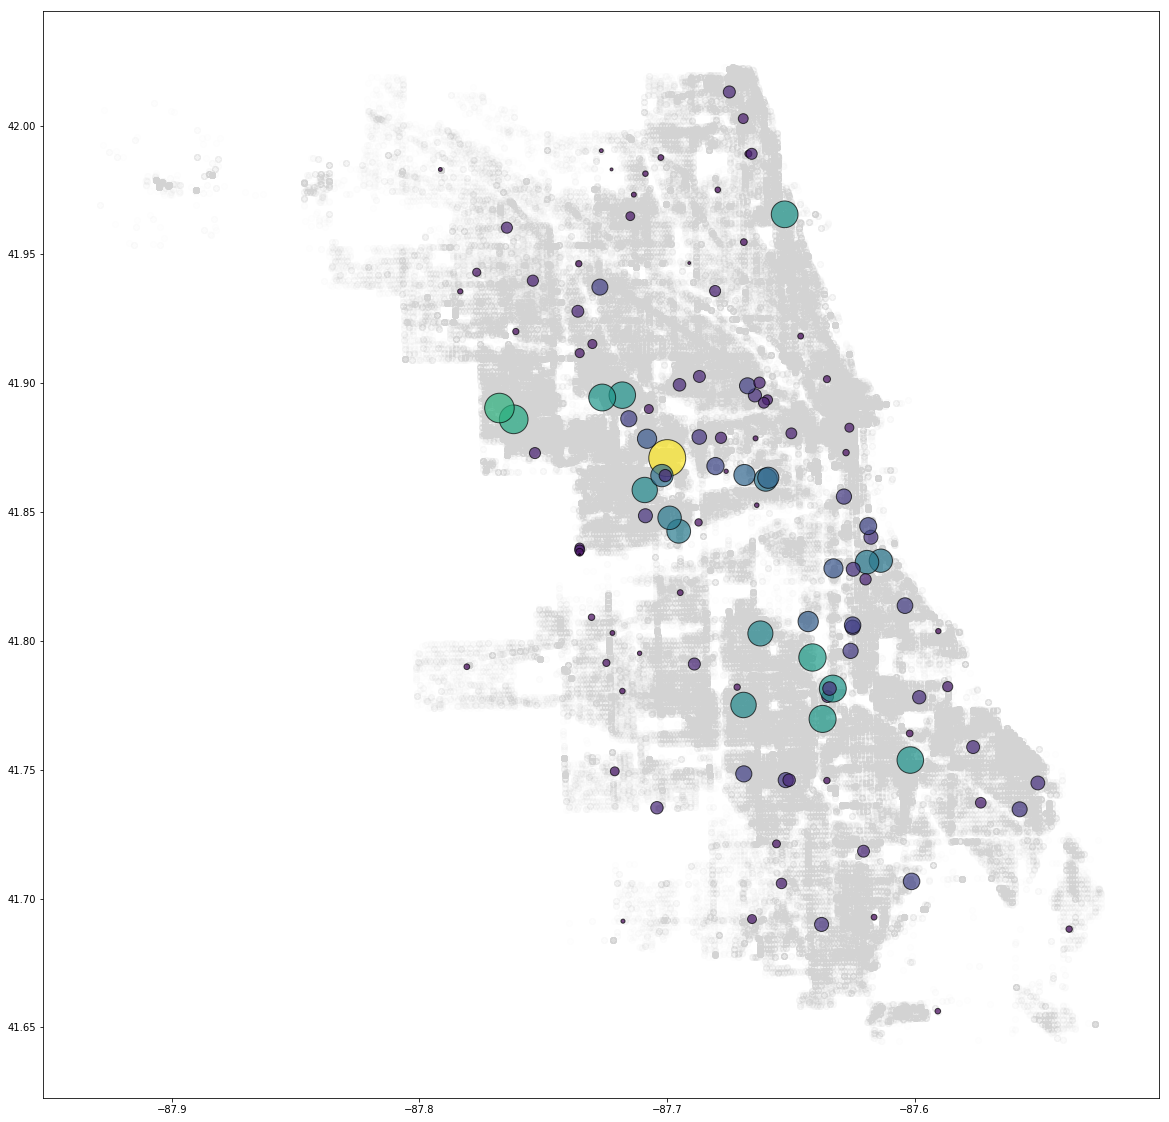

In [239]:
plt.figure(figsize=(20,20))
plt.scatter(X_crime, Y_crime, alpha=0.01, c='lightgrey')
plt.scatter(sorted_schools['School_Longitude'], sorted_schools['School_Latitude'], alpha=0.7, 
            c=sorted_schools['crimes_per_1000_students'], edgecolors='k',
            s=sorted_schools['crimes_per_1000_students'])

# Pickle Data

In [240]:
sorted_schools.to_pickle('../data/schools_crimes.pkl')